## Deep Learning Term Project for ECG (DIL700)

# Iteration 2

# Imports

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Custom functions
from general_functions import *

# Loading dataset

    Number of Samples: 14552
    Number of Categories: 2
    Sampling Frequency: 125Hz
    Data Source: Physionet's PTB Diagnostic Database

This dataset consists of a series of CSV files. Each of these CSV files contain a matrix, with each row representing an example in that portion of the dataset. The final element of each row denotes the class to which that example belongs. (https://www.kaggle.com/datasets/shayanfazeli/heartbeat)

In [12]:
normal_df = pd.read_csv('./Dataset_ptbdb/ptbdb_normal.csv',header=None)
abnormal_df = pd.read_csv('./Dataset_ptbdb/ptbdb_abnormal.csv',header=None)
# Combine to a full dataset
full_df = pd.concat([normal_df, abnormal_df], axis=0, ignore_index=True)

In [13]:
print('Number of samples per class: \n')
print('Normal:                 ', len(full_df[full_df[187]==0]))
print('Abnormal:               ', len(full_df[full_df[187]==1]))

Number of samples per class: 

Normal:                  4046
Abnormal:                10506


In [14]:
normal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Normal only contains class 0 --> healthy
normal_df[187].unique()

array([0.])

In [16]:
abnormal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
# Abnormal only contains class 1 --> not healthy
abnormal_df[187].unique()

array([1.])

In [18]:
full_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
# Full contains both classes
full_df[187].unique()

array([0., 1.])

In [20]:
labels = ['Normal', 'Abnormal']

# Preparation

In [21]:
# split the data into features and target
X = full_df.drop(187, axis=1)
y = full_df[187]

# Split data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [22]:
# validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.20, stratify=y_train_full, random_state=42)

In [23]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
12529,1.000000,0.829819,0.467386,0.203531,0.208926,0.182442,0.073075,0.078470,0.067680,0.049044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
8792,0.905602,0.734440,0.354772,0.154046,0.122925,0.165975,0.176349,0.177905,0.182054,0.176867,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
13408,1.000000,0.808531,0.117995,0.109900,0.061021,0.031756,0.022416,0.011519,0.006849,0.027086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2746,1.000000,0.529361,0.199217,0.094824,0.107873,0.109178,0.088734,0.079600,0.074815,0.075685,...,0.052197,0.055676,0.055676,0.057851,0.060896,0.067856,0.066551,0.0,0.0,0.0
366,1.000000,0.700711,0.349063,0.106658,0.077569,0.301228,0.371041,0.371687,0.404008,0.411765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13768,0.888561,0.430425,0.423939,0.391509,0.364976,0.339623,0.290094,0.295401,0.312500,0.303066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
5609,1.000000,0.338724,0.017969,0.000000,0.415993,0.477987,0.510332,0.546271,0.587601,0.543576,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2442,1.000000,0.551974,0.231668,0.007252,0.023368,0.076551,0.101128,0.092264,0.089847,0.087429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
11291,0.988811,0.376690,0.000000,0.014918,0.049417,0.059207,0.076457,0.055478,0.035431,0.037296,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [24]:
train_df = X_train.copy()
train_df[187] = y_train
valid_df = X_valid.copy()
valid_df[187] = y_valid
test_df = X_test.copy()	
test_df[187] = y_test

train_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
12529,1.000000,0.829819,0.467386,0.203531,0.208926,0.182442,0.073075,0.078470,0.067680,0.049044,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
8792,0.905602,0.734440,0.354772,0.154046,0.122925,0.165975,0.176349,0.177905,0.182054,0.176867,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
13408,1.000000,0.808531,0.117995,0.109900,0.061021,0.031756,0.022416,0.011519,0.006849,0.027086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2746,1.000000,0.529361,0.199217,0.094824,0.107873,0.109178,0.088734,0.079600,0.074815,0.075685,...,0.055676,0.055676,0.057851,0.060896,0.067856,0.066551,0.0,0.0,0.0,0.0
366,1.000000,0.700711,0.349063,0.106658,0.077569,0.301228,0.371041,0.371687,0.404008,0.411765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13768,0.888561,0.430425,0.423939,0.391509,0.364976,0.339623,0.290094,0.295401,0.312500,0.303066,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
5609,1.000000,0.338724,0.017969,0.000000,0.415993,0.477987,0.510332,0.546271,0.587601,0.543576,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2442,1.000000,0.551974,0.231668,0.007252,0.023368,0.076551,0.101128,0.092264,0.089847,0.087429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11291,0.988811,0.376690,0.000000,0.014918,0.049417,0.059207,0.076457,0.055478,0.035431,0.037296,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


# Dataset distribution

In [25]:
print('Number of samples in training data:')
print('Normal:                              ', len(train_df[train_df[187]==0]))
print('Abnormal:                            ', len(train_df[train_df[187]==1]))

Number of samples in training data:
Normal:                               2589
Abnormal:                             6723


In [26]:
print('Number of samples in validation data:')
print('Normal:                              ', len(valid_df[valid_df[187]==0]))
print('Abnormal:                            ', len(valid_df[valid_df[187]==1]))

Number of samples in validation data:
Normal:                               648
Abnormal:                             1681


In [27]:
print('Number of samples in test data:')
print('Normal:                              ', len(test_df[test_df[187]==0]))
print('Abnormal:                            ', len(test_df[test_df[187]==1]))

Number of samples in test data:
Normal:                               809
Abnormal:                             2102


Same ratio of the two classes in both the datasets

# Training some ML models

## Grid Search SVM

In [18]:
# Last time of execution: 21:47 minutes

# define the parameter values that should be searched
C_range = [0.1, 1, 10, 100]
gamma_range = [0.1, 1, 10]
kernel_range = ['linear', 'rbf', 'poly', 'sigmoid']
degree_range = [2, 3, 4]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range, gamma=gamma_range, kernel=kernel_range, degree=degree_range)

# instantiate the grid
grid_svm = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)

# # fit the grid with data
# grid_svm.fit(X_train, y_train)

# # examine the best model
# print(grid_svm.best_score_)
# print(grid_svm.best_params_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
0.9659590084020726
{'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


**Output from cell above:**

*Fitting 5 folds for each of 144 candidates, totalling 720 fits*

*0.9659590084020726*

*{'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}*

In [28]:
# Train SVM classifier
# svm = grid_svm.best_estimator_
svm = SVC(kernel='rbf', C=100, degree=2, gamma=1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=100, degree=2, gamma=1, random_state=42)

### Evaluation

In [29]:
# Evaluate SVM classifier
y_pred_svm = svm.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print(f'Accuracy:" {metrics.accuracy_score(y_test, y_pred_svm):.5f}')

Accuracy:" 0.96943


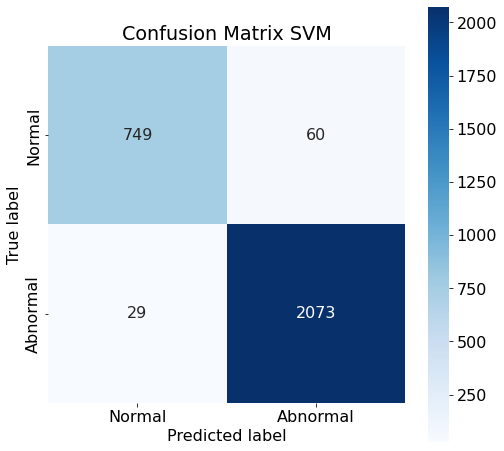

In [30]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [31]:
# Calculate the accurcay for each label
acc_per_class = cm.diagonal()/cm.sum(axis=1)
print('Accuracy per class: ', acc_per_class)
# Take the avearge of the accuracies
acc = np.mean(acc_per_class)
print('Macro/average accuracy: ', acc)

Accuracy per class:  [0.92583436 0.98620362]
Macro/average accuracy:  0.9560189895079029


In [32]:
report = classification_report(y_test, y_pred_svm, target_names=labels, digits=4)
print(report)

# Create the classification report table
results_table_latex(cm, report, "SVM with hyperparameter tuning", 2)

              precision    recall  f1-score   support

      Normal     0.9627    0.9258    0.9439       809
    Abnormal     0.9719    0.9862    0.9790      2102

    accuracy                         0.9694      2911
   macro avg     0.9673    0.9560    0.9615      2911
weighted avg     0.9693    0.9694    0.9692      2911



### False Positive Rate

In [33]:
num_classes = cm.shape[0]
total_abnormal= 0
total_wrong_predicted = 0
for i in range(num_classes-1): 
    total_abnormal_class = np.sum(cm[i+1, :])
    total_abnormal = total_abnormal + total_abnormal_class

    wrong_predicted = np.sum(cm[i+1, 0])
    total_wrong_predicted = total_wrong_predicted + wrong_predicted

print("Total number of abnormal instances: ", total_abnormal)
print("Total number of wrong predicted abnormal instances: ", total_wrong_predicted)
print("Percentage of sick persons that are classified as normal: ", wrong_predicted/total_abnormal_class*100, "%")    

Total number of abnormal instances:  2102
Total number of wrong predicted abnormal instances:  29
Percentage of sick persons that are classified as normal:  1.379638439581351 %


## Grid Search RF

In [23]:
# Last time of execution: 37:11 minutes

# Define the parameter values that should be searched
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the grid search object
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# # Fit the grid search object to the data
# grid_rf.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {grid_rf.best_params_}")
# print(f"Best score: {grid_rf.best_score_}")

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9687503783613624


**Output from cell above:**

*Fitting 5 folds for each of 864 candidates, totalling 4320 fits*

*Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}*

*Best score: 0.9687503783613624*

In [34]:
# Train SVM classifier
# rfc = grid_rf.best_estimator_
rfc = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       n_estimators=200, random_state=42)

### Evaluation

In [35]:
# Evaluate random forest classifier
y_pred_rf = rfc.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print(f'Accuracy:" {metrics.accuracy_score(y_test, y_pred_rf):.5f}')

Accuracy:" 0.97011


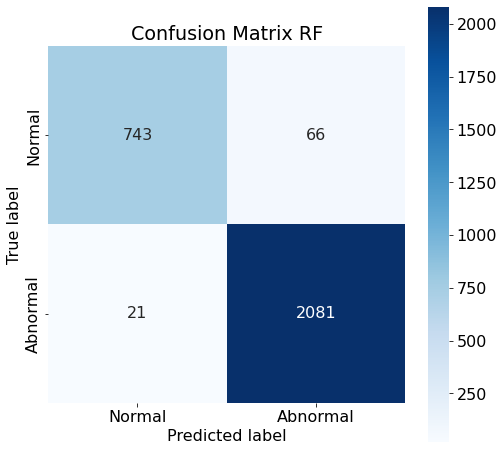

In [36]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
ax = plt.subplot(111)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', square=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix RF')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

In [37]:
# Calculate the accurcay for each label
acc_per_class = cm.diagonal()/cm.sum(axis=1)
print('Accuracy per class: ', acc_per_class)
# Take the avearge of the accuracies
acc = np.mean(acc_per_class)
print('Macro/average accuracy: ', acc)

Accuracy per class:  [0.9184178  0.99000951]
Macro/average accuracy:  0.9542136572503201


In [38]:
report = classification_report(y_test, y_pred_rf, target_names=labels, digits=4)
print(report)

# Create the classification report table
results_table_latex(cm, report, "Random Forest with hyperparameter tuning", 2)

              precision    recall  f1-score   support

      Normal     0.9725    0.9184    0.9447       809
    Abnormal     0.9693    0.9900    0.9795      2102

    accuracy                         0.9701      2911
   macro avg     0.9709    0.9542    0.9621      2911
weighted avg     0.9702    0.9701    0.9698      2911



### False Positive Rate

In [39]:
num_classes = cm.shape[0]
total_abnormal= 0
total_wrong_predicted = 0
for i in range(num_classes-1): 
    total_abnormal_class = np.sum(cm[i+1, :])
    total_abnormal = total_abnormal + total_abnormal_class

    wrong_predicted = np.sum(cm[i+1, 0])
    total_wrong_predicted = total_wrong_predicted + wrong_predicted

print("Total number of abnormal instances: ", total_abnormal)
print("Total number of wrong predicted abnormal instances: ", total_wrong_predicted)
print("Percentage of sick persons that are classified as normal: ", wrong_predicted/total_abnormal_class*100, "%")    

Total number of abnormal instances:  2102
Total number of wrong predicted abnormal instances:  21
Percentage of sick persons that are classified as normal:  0.9990485252140819 %
